# This notebook allows to manage data (integration, plotting) just from a .json_file

SyntaxError: invalid syntax (66988149.py, line 1)

##### Import modules

In [1]:
from module_integrator.integrator import Integrator

ERROR:pygix.transform:Unable to import pyFAI.ocl_azim_csr: cannot import name 'ocl_azim_csr' from 'pyFAI' (C:\ProgramData\Anaconda3\envs\edgar\lib\site-packages\pyFAI\__init__.py)
ERROR:pygix.transform:Unable to import pyFAI.ocl_azim_lut for: cannot import name 'ocl_azim_lut' from 'pyFAI' (C:\ProgramData\Anaconda3\envs\edgar\lib\site-packages\pyFAI\__init__.py)
ERROR:pygix.transform:Unable to import pyFAI.ocl_sort for: cannot import name 'ocl_sort' from 'pyFAI' (C:\ProgramData\Anaconda3\envs\edgar\lib\site-packages\pyFAI\__init__.py)


##### Main attributed

In [2]:
main_dir = r'D:\Datos_Sincrotrones\ALBA_NCD_Nov2022\PROCESSED'
ponifile_path = 'cr2O3.poni'
name_setup = 'ALBA_NCD'

##### Create the integrator instance directly from a dictionary with all the required attributes

In [3]:
integrator = Integrator(
    main_dir=main_dir,
    name_setup=name_setup,
    ponifile_path=ponifile_path,
    qz_parallel=False,
    qr_parallel=True,
    extension='.edf',
    wildcards='*Y6*phase2*045*0000*',
    search_files=True,
)

Batch processing started. 
Time: 2023-03-20 18:17:18.769845

[0, 20]
[1, 3]
{'Name': 'proj1', 'Type': 'Horizontal', 'Suffix': 'proj1', 'Unit_input': '2th_deg', 'Ip_range': [0, 20], 'Oop_range': [1, 3], 'Unit': 'q_nm^-1'}
[0.0, 21.824054653428693]
[1.096748553370321, 3.289911579877165]


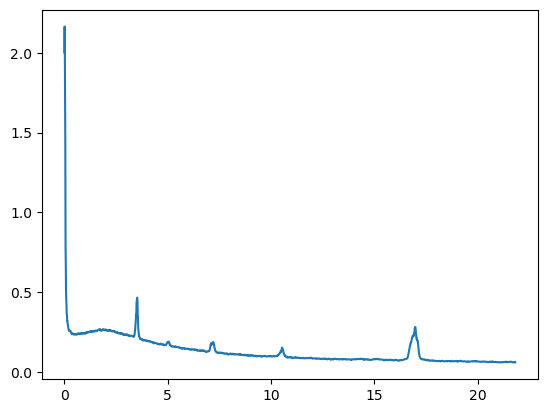

✅Processing: [██████████████████████████████████████████████████] 100.0%
Batch processing is over. 
Time: 2023-03-20 18:17:20.266591

The process has lasted 1.50 seconds.

EN ESTE PUEBLO HAY VERDADERA DEVOCIÓN POR FULKNER


In [4]:
# dict_test = {
#     'Name': 'proj1', 
#     'Type': 'Horizontal', 
#     'Suffix': 'proj1',
#     "Unit_input": "q_nm^-1",
#     "Ip_range": [9, 10],
#     "Oop_range": [0, 30],
#     'Unit': 'q_nm^-1',
# }

integrator.integration(
    title='todas',
    list_integrations=['proj1'],
    sorted=True,
    x_label='Unit',
    y_label='Suffix', 
    logging=True,
)

##### Launch a batch integration

In [1]:
from pygix.transform import Transform
from module_edf.edf import EdfClass
from pygix.grazing_units import Q_NM
import matplotlib.pyplot as plt
filename = r'D:\Datos_Sincrotrones\ALBA_NCD_Nov2022\PROCESSED\Y6_phase2\rayonix_Y6_phase2_045_0000.edf'
name_setup = 'ALBA_NCD'
ponifile_path = r'D:\Datos_Sincrotrones\ALBA_NCD_Nov2022\PROCESSED\cr2O3.poni'
edf = EdfClass(
    filename=filename,
    name_setup=name_setup,
    ponifile_path=ponifile_path,
    qz_parallel=False,
)
# edf.plot_Qmesh()


ERROR:pygix.transform:Unable to import pyFAI.ocl_azim_csr: cannot import name 'ocl_azim_csr' from 'pyFAI' (C:\ProgramData\Anaconda3\envs\edgar\lib\site-packages\pyFAI\__init__.py)
ERROR:pygix.transform:Unable to import pyFAI.ocl_azim_lut for: cannot import name 'ocl_azim_lut' from 'pyFAI' (C:\ProgramData\Anaconda3\envs\edgar\lib\site-packages\pyFAI\__init__.py)
ERROR:pygix.transform:Unable to import pyFAI.ocl_sort for: cannot import name 'ocl_sort' from 'pyFAI' (C:\ProgramData\Anaconda3\envs\edgar\lib\site-packages\pyFAI\__init__.py)


In [30]:
from pygix.transform import Transform
import fabio
import numpy as np
import matplotlib.pyplot as plt
filename = r'D:\Datos_Sincrotrones\ALBA_NCD_Nov2022\PROCESSED\Y6_phase2\rayonix_Y6_phase2_045_0000.edf'
ponifile_path = r'D:\Datos_Sincrotrones\ALBA_NCD_Nov2022\PROCESSED\cr2O3.poni'
data = np.log10(fabio.open(filename).data)
tr = Transform()
tr.load(ponifile_path)
tr.set_incident_angle(0.12)
tr.set_tilt_angle(0.0)
tr.set_sample_orientation(3)

C:\Users\edgar1993a\AppData\Local\Temp\ipykernel_24376\1110306198.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(fabio.open(filename).data)


C:\Users\edgar1993a\AppData\Local\Temp\ipykernel_24376\1431354228.py:9: RuntimeWarning: divide by zero encountered in log10
  a = np.log10(a)
C:\Users\edgar1993a\AppData\Local\Temp\ipykernel_24376\1431354228.py:9: RuntimeWarning: invalid value encountered in log10
  a = np.log10(a)


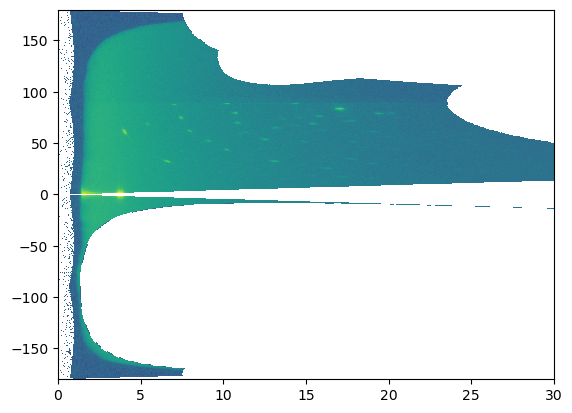

In [35]:
a,x,y=tr.transform_polar(
    data=data,
    npt=(2000,2000),
    q_range=[0,30],
    chi_range=[-180,180],
    unit='nm',
    method='bbox',
)
a = np.log10(a)
X, Y = np.meshgrid(x ,y)
plt.pcolormesh(X,Y,a)
plt.show()

In [ ]:
# y,x=tr.integrate_1d(
#     data=edf.get_data(),
#     npt=1000,
#     p0_range=[0,30],
# #     p1_range=[-180,180], #full
# #     p1_range=[-90,0], # complete
#     p1_range=[-10,10], # oop
# #      p1_range=[90,92], # ip
# )
# plt.plot(x,y)
# plt.show()